---
---

<h1><center><ins>Exercise Sheet 5</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos

## Exercise 1 - Numerical derivative

**(A)** Compute the derivative of the following two functions:

$$ f_1(x) = x^2 + \cos(x) $$

$$ f_2(x) = \exp(x) - x^3 $$

in correspondence of at least $N = 50$ values $x_i$ ($i = 1, ..., N$) of the variable $x$ in the interval $[1,5]$. To do this, *write your own code to compute the derivatives numerically*.

**(B)** Compare the resulting values you get for the numerical derivatives with the corresponding analytic solutions. Calculate the value of the quantity $q$ for each function:

$$ q = \sum_{i=1}^N \frac{\left[d_i - f'(x_i) \right]}{f'(x_i)} $$

where $d_i$ are the values you obtained for the numerical derivatives for each of the $N$ abscissas, and $f'(x_i)$ are the analytical derivatives evaluated in points $x_i$. How does the value of $q$ change when changing the value of $h$ to compute the derivatives numerically? How do the values of $q$ compare for the two functions? Discuss your findings.

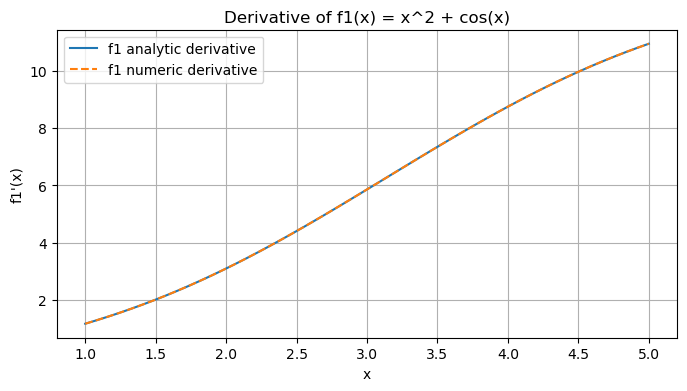

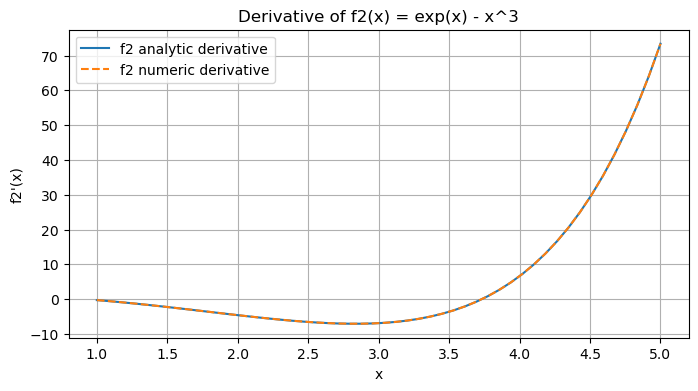

In [12]:
# functions and derivatives 
def f1(x):
    return x**2 + np.cos(x)

def f1_derivative_analytic(x):
    return 2*x - np.sin(x)

def f2(x):
    return np.exp(x) - x**3

def f2_derivative_analytic(x):
    return np.exp(x) - 3*x**2


# Parameters 
N = 50          # number of points
a, b = 1.0, 5.0 # interval [1,5]
h = 1e-6        # small step for finite differences

# Create N equally spaced x values
x_values = np.linspace(a, b, N)


# numerical differences 
f1_num = (f1(x_values + h) - f1(x_values - h)) / (2*h)
f2_num = (f2(x_values + h) - f2(x_values - h)) / (2*h)

# Analytical derivatives
f1_analytic = f1_derivative_analytic(x_values)
f2_analytic = f2_derivative_analytic(x_values)


plt.figure(figsize=(8, 4))
plt.plot(x_values, f1_analytic, label="f1 analytic derivative")
plt.plot(x_values, f1_num, '--', label="f1 numeric derivative")
plt.title("Derivative of f1(x) = x^2 + cos(x)")
plt.xlabel("x")
plt.ylabel("f1'(x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_values, f2_analytic, label="f2 analytic derivative")
plt.plot(x_values, f2_num, '--', label="f2 numeric derivative")
plt.title("Derivative of f2(x) = exp(x) - x^3")
plt.xlabel("x")
plt.ylabel("f2'(x)")
plt.legend()
plt.grid(True)
plt.show()

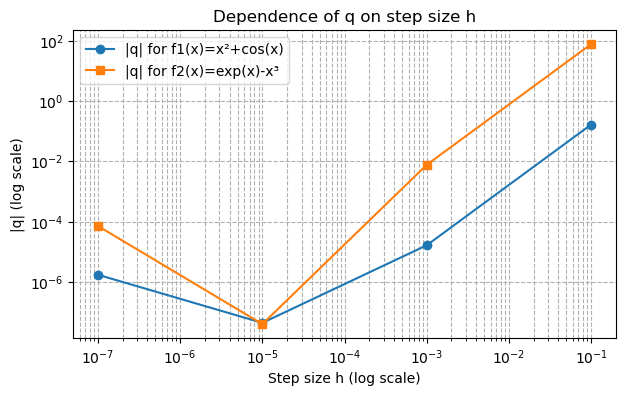

In [15]:
# Different step sizes for testing
h_values = [1e-1, 1e-3, 1e-5, 1e-7]


# Function to compute q for a given function and step size
def compute_q(f, f_prime_analytic, x_values, h):
    # Central difference formula
    d_num = (f(x_values + h) - f(x_values - h)) / (2*h)
    d_an = f_prime_analytic(x_values)
    
    # Compute q = sum([d_i - f'(x_i)] * f'(x_i))
    q_value = np.sum((d_num - d_an) * d_an)
    return q_value


# Compute q for each h for both functions
q_f1_list = []
q_f2_list = []

for h in h_values:
    q_f1 = compute_q(f1, f1_derivative_analytic, x_values, h)
    q_f2 = compute_q(f2, f2_derivative_analytic, x_values, h)
    q_f1_list.append(q_f1)
    q_f2_list.append(q_f2)

plt.figure(figsize=(7,4))
plt.loglog(h_values, np.abs(q_f1_list), 'o-', label="|q| for f1(x)=x²+cos(x)")
plt.loglog(h_values, np.abs(q_f2_list), 's-', label="|q| for f2(x)=exp(x)-x³")
plt.xlabel("Step size h (log scale)")
plt.ylabel("|q| (log scale)")
plt.title("Dependence of q on step size h")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## Exercise 2 - Newton-Cotes formulas

In the file ```surface_luminosity.txt``` you will find the numerical function describing the surface luminosity $\Sigma$ of a globular star cluster as a function of the distance $R$ from its centre (projected on the plane of the sky). Compute the total luminosity $L$ of the system by performing the integral

$$ L = \int_0^{R_{\text{max}}} \Sigma(R) \, 2 \pi R \, dR $$

using the trapezoid rule and Simpson's rule, and compare the results you obtain. To do this, first choose one of these methods and implement **your own algorithm to compute the integral with it**; for the other method, use the corresponding built-in python function ```scipy.integrate.trapz``` or ```scipy.integrate.simps``` and familiarize on its usage.

## Exercise 3 - Gaussian Quadrature

**(A)** Compute the following integral by using a 4-point Gaussian quadrature. 

$$ I = \int_{-1}^{1} \cos(x) dx $$

To do this, use the Legendre polynomial of degree 4:

$$ P_4(x) = \frac{1}{8}(35 x^4 - 30 x^2 +3) $$

At this link: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature you can find the roots of Legendre polynomials and the necessary weights to solve the integral (i.e., you do not have to calculate them all from scratch!).

**(B)** Compare the result with the ones you obtain when using a Legendre polynomial of degree 3, 2, and 1, and comment your findings.

## Exercise 4 - Monte Carlo integration 

Consider the following integral:
$$ I = \int_0^1 \cos \left(\frac{\pi x}{2} \right) dx = \frac{2}{\pi} $$

**(A)** Compute the above integral and its variance by using the following Monte Carlo methods:

1. mean value

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.



## Exercise 5 - Monte Carlo integration continued (optional)

**(A)** Compute the above integral from Exercise 4 and its variance by using the other Monte Carlo methods covered in the lecture:

2. importance sampling
3. control variates
4. antithetic variates

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.